In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [2]:
df = pd.read_csv(r'C:\Users\ashmi\OneDrive\Desktop\Data Science\Data_Science_Class\Pandas\csv_data\car_price_prediction.csv')
df.head(3)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2


# About dataset

* ID: Unique identifier for each car listing.
* Price: The target variable; it's the price of the 
* car that you want to predict.
* Levy: Tax or additional charges imposed on the car.
* Manufacturer: The company that produced the car.
* Model: The specific model or version of the car.
* Prod. year: The year in which the car was manufactured.
* Category: The category or type of the car (e.g., SUV, Sedan).
* Leather interior: Indicates whether the car has a 
 leather interior (Yes/No).
* Fuel type: The type of fuel the car uses (e.g., Petrol, Diesel).
* Engine volume: The total volume of all cylinders in the engine.
* Mileage: The total distance the car has traveled.
* Cylinders: The number of cylinders in the car's engine.
* Gear box type: The type of gearbox the car has (e.g., Automatic, Manual).
* Drive wheels: The type of wheels that receive power from the engine (e.g., Front, Rear).
* Doors: The number of doors on the car.
* Wheel: The configuration of the wheels (e.g., Left-hand drive, Right-hand drive).
* Color: The color of the car.
* Airbags: The number of airbags in the car for safety.



In [3]:
df.shape

(19237, 18)

In [4]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

# which characterstics affect the price:
In this dataset the most important columns for predicting car prices are :

* Manufacturer and Model:  The brand and specific model of a car can influence its price significantly.
* Prod. year: The manufacturing year of the car is crucial because older cars generally have lower prices.
* Engine volume: The size of the engine can impact performance and, consequently, the price.
* Mileage: The distance a car has traveled is inversely related to its price; lower mileage often correlates with a higher price.
* Fuel type: The type of fuel the car uses can affect both operating costs and overall value.
* Levy: Additional charges or taxes imposed on the car may contribute to its overall cost.
* Category: The type of car (e.g., SUV, Sedan) can influence pricing based on market demand.
* Leather interior: The presence of a leather interior can add to the perceived value of the car.

So we remove the some extras columns.

In [6]:
df['Model'].unique()


array(['RX 450', 'Equinox', 'FIT', ..., 'E 230 124', 'RX 450 F SPORT',
       'Prius C aqua'], dtype=object)

In [7]:
df['Manufacturer'].unique()

array(['LEXUS', 'CHEVROLET', 'HONDA', 'FORD', 'HYUNDAI', 'TOYOTA',
       'MERCEDES-BENZ', 'OPEL', 'PORSCHE', 'BMW', 'JEEP', 'VOLKSWAGEN',
       'AUDI', 'RENAULT', 'NISSAN', 'SUBARU', 'DAEWOO', 'KIA',
       'MITSUBISHI', 'SSANGYONG', 'MAZDA', 'GMC', 'FIAT', 'INFINITI',
       'ALFA ROMEO', 'SUZUKI', 'ACURA', 'LINCOLN', 'VAZ', 'GAZ',
       'CITROEN', 'LAND ROVER', 'MINI', 'DODGE', 'CHRYSLER', 'JAGUAR',
       'ISUZU', 'SKODA', 'DAIHATSU', 'BUICK', 'TESLA', 'CADILLAC',
       'PEUGEOT', 'BENTLEY', 'VOLVO', 'სხვა', 'HAVAL', 'HUMMER', 'SCION',
       'UAZ', 'MERCURY', 'ZAZ', 'ROVER', 'SEAT', 'LANCIA', 'MOSKVICH',
       'MASERATI', 'FERRARI', 'SAAB', 'LAMBORGHINI', 'ROLLS-ROYCE',
       'PONTIAC', 'SATURN', 'ASTON MARTIN', 'GREATWALL'], dtype=object)

In [8]:
df['Mileage'].unique()

array(['186005 km', '192000 km', '200000 km', ..., '140607 km',
       '307325 km', '186923 km'], dtype=object)

In [9]:
df['Fuel type'].unique()

array(['Hybrid', 'Petrol', 'Diesel', 'CNG', 'Plug-in Hybrid', 'LPG',
       'Hydrogen'], dtype=object)

## Quality

- Drop the extra columns which dosen't affect the price
- convert data type Mileage  objects into int or remove km.
- convert Levy type object into float also replace '-' into '00'

In [10]:
# Backup copy to store the dataset
backup= df.copy()

In [11]:
df.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [12]:
df['Category'].unique()

array(['Jeep', 'Hatchback', 'Sedan', 'Microbus', 'Goods wagon',
       'Universal', 'Coupe', 'Minivan', 'Cabriolet', 'Limousine',
       'Pickup'], dtype=object)

# Cleaning

In [13]:
# Remove the not related columns
columns_to_drop = ['ID','Color','Doors','Airbags','Drive wheels','Wheel','Gear box type','Cylinders']
df = df.drop(columns=columns_to_drop)

In [14]:
df.head(2)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Price             19237 non-null  int64 
 1   Levy              19237 non-null  object
 2   Manufacturer      19237 non-null  object
 3   Model             19237 non-null  object
 4   Prod. year        19237 non-null  int64 
 5   Category          19237 non-null  object
 6   Leather interior  19237 non-null  object
 7   Fuel type         19237 non-null  object
 8   Engine volume     19237 non-null  object
 9   Mileage           19237 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.5+ MB


In [16]:
# changes astype object into float
df['Levy']=df['Levy'].str.replace(',',' ').str.replace('-','00').astype(float)

In [17]:
df['Levy'].unique()

array([ 1399.,  1018.,     0.,   862.,   446.,   891.,   761.,   751.,
         394.,  1053.,  1055.,  1079.,   810.,  2386.,  1850.,   531.,
         586.,  1249.,  2455.,   583.,  1537.,  1288.,   915.,  1750.,
         707.,  1077.,  1486.,  1091.,   650.,   382.,  1436.,  1194.,
         503.,  1017.,  1104.,   639.,   629.,   919.,   781.,   530.,
         640.,   765.,   777.,   779.,   934.,   769.,   645.,  1185.,
        1324.,   830.,  1187.,  1111.,   760.,   642.,  1604.,  1095.,
         966.,   473.,  1138.,  1811.,   988.,   917.,  1156.,   687.,
       11714.,   836.,  1347.,  2866.,  1646.,   259.,   609.,   697.,
         585.,   475.,   690.,   308.,  1823.,  1361.,  1273.,   924.,
         584.,  2078.,   831.,  1172.,   893.,  1872.,  1885.,  1266.,
         447.,  2148.,  1730.,   730.,   289.,   502.,   333.,  1325.,
         247.,   879.,  1342.,  1327.,  1598.,  1514.,  1058.,   738.,
        1935.,   481.,  1522.,  1282.,   456.,   880.,   900.,   798.,
      

In [18]:
df['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 19237, dtype: object

In [19]:
# remove the km also only extract the numerical value
df['Mileage']=df['Mileage'].str.split(' ').str.get(0).str.replace(',','')

In [20]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901


In [21]:
df['Mileage'] = df['Mileage'].astype(int)

In [22]:
df['Engine volume']=df['Engine volume'].str.split(' ').str.get(0).str.replace(',','')
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0', '2.2', '4.7', '1.5', '4.4', '3.0', '1.4', '3.6', '2.3',
       '5.5', '2.8', '3.2', '3.8', '4.6', '1.2', '5', '1.7', '2.9', '0.5',
       '1.9', '2.7', '4.8', '5.3', '0.4', '1.1', '2.1', '0.7', '5.4',
       '3.7', '1', '2.6', '0.8', '0.2', '5.7', '6.7', '6.2', '3.4', '6.3',
       '4.3', '4.2', '0', '4.0', '20', '0.3', '5.9', '5.6', '6', '0.6',
       '6.8', '4.5', '7.3', '0.1', '1.0', '3.1', '5.0', '6.4', '3.9',
       '0.9', '5.2', '5.8'], dtype=object)

In [23]:
df['Engine volume']=df['Engine volume'].astype(float)
df['Engine volume']

0        3.5
1        3.0
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234    2.0
19235    2.0
19236    2.4
Name: Engine volume, Length: 19237, dtype: float64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15688 entries, 0 to 19236
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             15688 non-null  int64  
 1   Levy              15688 non-null  float64
 2   Manufacturer      15688 non-null  object 
 3   Model             15688 non-null  object 
 4   Prod. year        15688 non-null  int64  
 5   Category          15688 non-null  object 
 6   Leather interior  15688 non-null  object 
 7   Fuel type         15688 non-null  object 
 8   Engine volume     15688 non-null  float64
 9   Mileage           15688 non-null  int32  
dtypes: float64(2), int32(1), int64(2), object(5)
memory usage: 1.3+ MB


In [56]:
df.describe()

,Price,Levy,Prod. year,Engine volume,Mileage
count,1.568800e+04,15688.000000,15688.000000,15688.000000,1.568800e+04
mean,2.030360e+04,561.286716,2010.519059,2.212659,1.840450e+06
std,2.108857e+05,559.325902,6.014942,0.805916,5.359551e+07
min,1.000000e+00,0.000000,1939.000000,0.000000,0.000000e+00
25%,7.527000e+03,0.000000,2008.000000,1.700000,6.659850e+04
50%,1.426900e+04,639.000000,2012.000000,2.000000,1.210000e+05
75%,2.341400e+04,862.000000,2014.000000,2.500000,1.800000e+05
max,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09


In [57]:
df.describe(include=object)

,Manufacturer,Model,Category,Leather interior,Fuel type
count,15688,15688,15688,15688,15688
unique,65,1590,11,2,7
top,HYUNDAI,Prius,Sedan,Yes,Petrol
freq,3047,944,6997,10536,8801


In [58]:
df.isna().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
dtype: int64

In [59]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901
...,...,...,...,...,...,...,...,...,...,...
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,Yes,Hybrid,1.8,307325
19232,8467,0.0,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0,300000
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2.0,116365


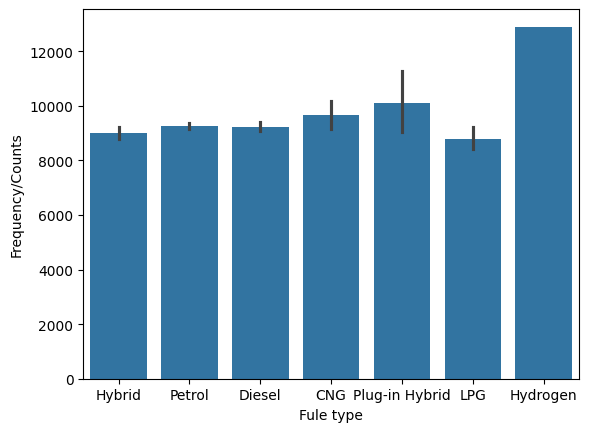

In [60]:
import seaborn as sns
sns.barplot(x=df['Fuel type'].values,y= df['Fuel type'].index)
plt.xlabel("Fule type")
plt.ylabel('Frequency/Counts')
plt.show()

The heighest frequency of fuel type is Hydrogen and lowest frequency of fuel type is LPG.

<Axes: >

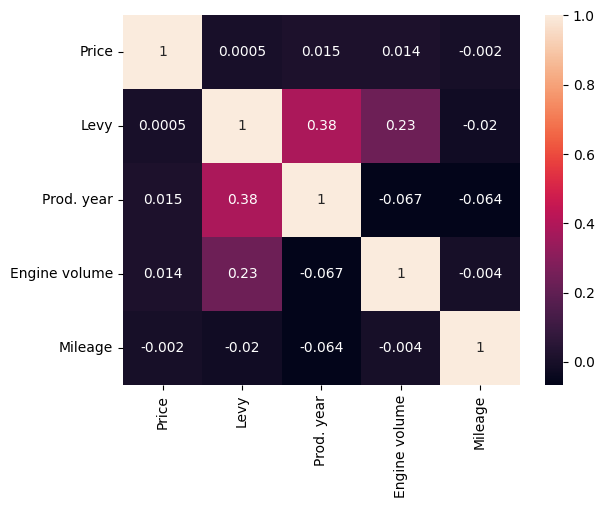

In [61]:
# Visulize the correlation between price
import seaborn as sns
sns.heatmap(df.corr(numeric_only=True),annot=True)

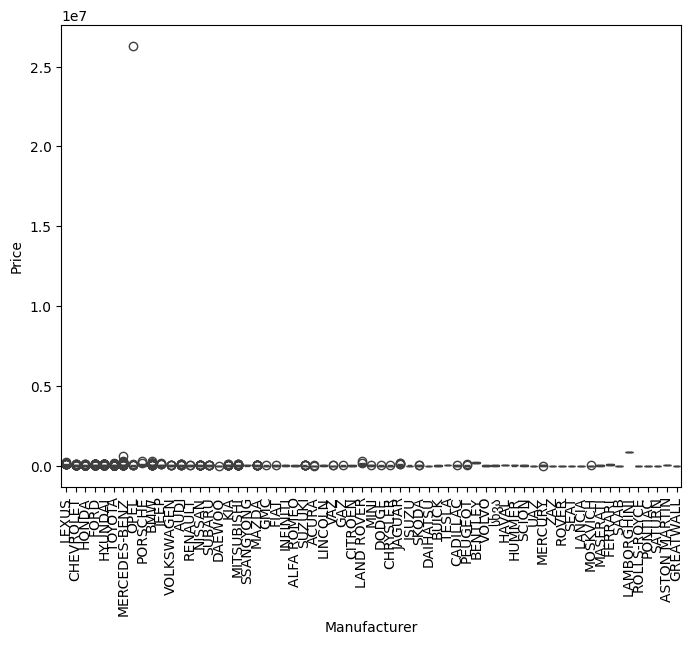

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(x = 'Manufacturer',y = 'Price',data=df)
plt.xticks(rotation=(90))
plt.show()

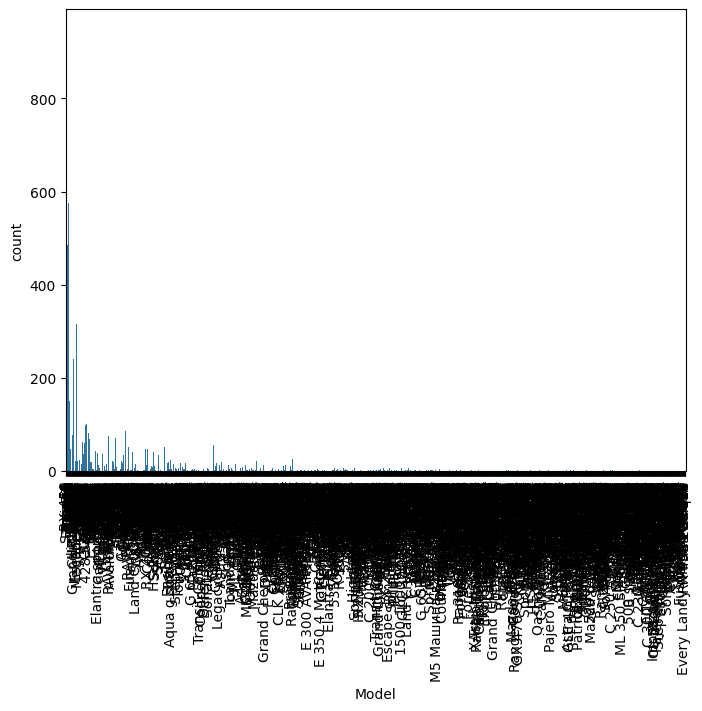

In [63]:
plt.figure(figsize=(8,6))
sns.countplot(x ='Model',data=df)
plt.xticks(rotation=(90))
plt.show()

In [64]:
# To create a new csv file of cleaning dataset
df.to_csv('Cleaned_car.csv')

# Model

In [65]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901


In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.shape

(15688, 10)

In [68]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,192000
2,8467,0.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000
3,3607,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966
4,11726,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901


In [70]:
X = df.drop(columns='Price')
y = df['Price']

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Encoding the categorical data into numerical
 We can encode folowing data(using One_Hot_encoding):
 * Manufacturer
 * Model
 * Category
 * Fule type

 (Label encoding):
 * 	Leather interior

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline,make_pipeline


In [73]:
X.columns

Index(['Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage'],
      dtype='object')

In [83]:
ohe = OneHotEncoder()
lbe=LabelEncoder()
X['Manufacturer name']=lbe.fit_transform(X['Manufacturer'])
X['Category name']=lbe.fit_transform(X['Category'])
X['Fule_type ']=lbe.fit_transform(X['Fuel type'])



KeyError: 'Manufacturer'

In [89]:
X['Model type'] = lbe.fit_transform(X['Model'])
X = X.drop(columns=['Model'])

In [ ]:
X['leather seats']=lbe.fit_transform(X['Leather interior'])
X = X.drop(columns=['Leather interior'])

If we have an encoded manufacture,category, fuel type etc so we don't need to non encoded data.

so we want to drop it out from our dataset.

In [ ]:
columns_to_drop = ['Manufacturer', 'Category','Fuel type','Model']
X = X.drop(columns=columns_to_drop)

In [90]:
X.head()

,Levy,Prod. year,Engine volume,Mileage,Manufacturer name,Category name,Fule_type,leather seats,Model type
0,1399.0,2010,3.5,186005,32,4,2,1,1242
1,1018.0,2011,3.0,192000,8,4,5,0,658
2,0.0,2006,1.3,200000,21,3,5,0,684
3,862.0,2011,2.5,168966,16,4,2,1,661
4,446.0,2014,1.3,91901,21,3,5,1,684


In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15688 entries, 0 to 19236
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Levy               15688 non-null  float64
 1   Prod. year         15688 non-null  int64  
 2   Engine volume      15688 non-null  float64
 3   Mileage            15688 non-null  int32  
 4   Manufacturer name  15688 non-null  int32  
 5   Category name      15688 non-null  int32  
 6   Fule_type          15688 non-null  int32  
 7   leather seats      15688 non-null  int32  
 8   Model type         15688 non-null  int32  
dtypes: float64(2), int32(6), int64(1)
memory usage: 857.9 KB


In [100]:
X['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)